# We will take the Housing dataset which contains information about different houses in Boston. This data was originally a part of UCI Machine Learning Repository and has been removed now. We can also access this data from the scikit-learn library. There are 506 samples and 13 feature variables in this dataset. The objective is to predict the value of prices of the house using the given features.

# First, we will import the required libraries.

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn import datasets 
%matplotlib inline

In [46]:
from sklearn.datasets import load_boston
boston_dataset = datasets.load_boston()

In [47]:
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

data: contains the information for various houses
target: prices of the house
feature_names: names of the features
DESCR: describes the dataset

# We will now load the data into a pandas dataframe using pd.DataFrame. We then print the first 5 rows of the data using head()

In [4]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


# We can see that the target value MEDV is missing from the data. We create a new column of target values and add it to the dataframe.

In [5]:
boston['MEDV'] = boston_dataset.target

# We count the number of missing values for each feature using isnull()

In [6]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

# Let’s first plot the distribution of the target variable MEDV. We will use the distplot function from the seaborn library.

C:\Users\hp\anaconda3\envs\dtale\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


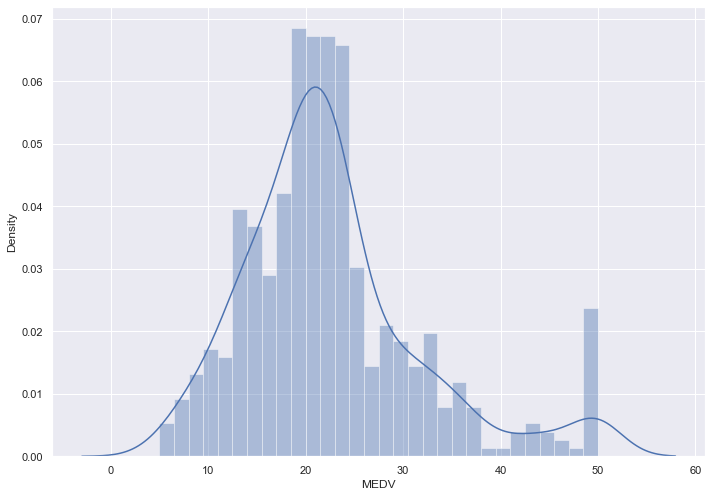

In [7]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

 We see that the values of MEDV are distributed normally with few outliers.

<AxesSubplot:>

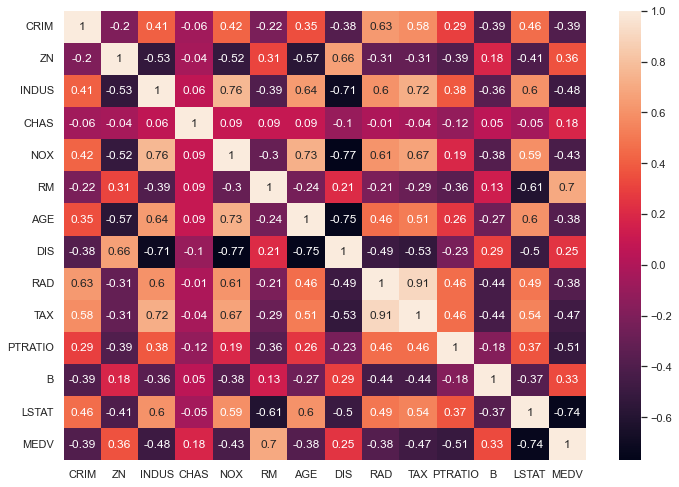

In [8]:
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

 **Observations:**
•To fit a linear regression model, we select those features which have a high correlation with our target variable MEDV. By looking at the correlation matrix we can see that RM has a strong positive correlation with MEDV (0.7) where as LSTAT has a high negative correlation with MEDV(-0.74).

•An important point in selecting features for a linear regression model is to check for multi-co-linearity. The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. We should not select both these features together for training the model. Check this for an explanation. Same goes for the features DIS and AGE which have a correlation of -0.75.

# Using a scatter plot let’s see how these features vary with MEDV.

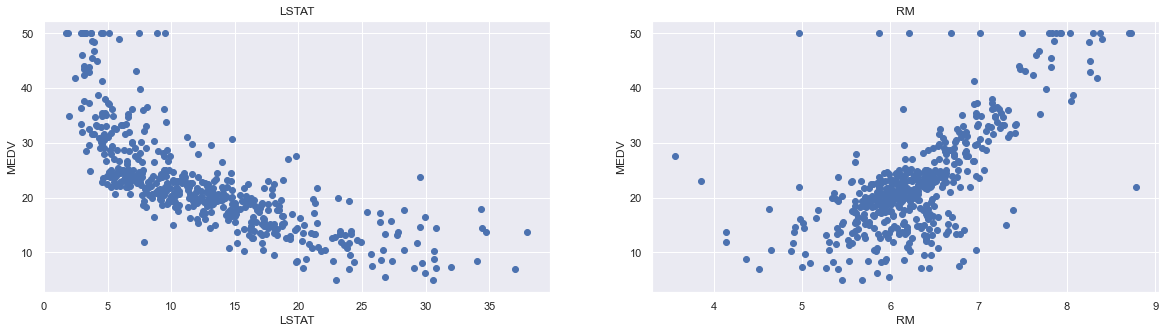

In [9]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

# **Observations:**

•The prices increase as the value of RM increases linearly. There are few outliers and the data seems to be capped at 50.

•The prices tend to decrease with an increase in LSTAT. Though it doesn’t look to be following exactly a linear line.

# **Preparing the data for training the model**
We concatenate the LSTAT and RM columns using np.c_ provided by the numpy library.

In [10]:
pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])

,LSTAT,RM
0,4.98,6.575
1,9.14,6.421
2,4.03,7.185
3,2.94,6.998
4,5.33,7.147
...,...,...
501,9.67,6.593
502,9.08,6.120
503,5.64,6.976
504,6.48,6.794


In [11]:
boston['MEDV']

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [12]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

In [13]:
x.head()

0    6.575
1    6.421
2    7.185
3    6.998
4    7.147
Name: RM, dtype: float64

In [14]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

# **Splitting the data into training and testing sets**
Next, we split the data into training and testing sets. We train the model with 80% of the samples and test with the remaining 20%. We do this to assess the model’s performance on unseen data. To split the data we use train_test_split function provided by scikit-learn library. We finally print the sizes of our training and test set to verify if the splitting has occurred properly.


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)


In [16]:
X_train.shape

(404, 2)

In [17]:
X_test.shape

(102, 2)

In [18]:
Y_train.shape

(404,)

In [19]:
Y_test.shape

(102,)

# **Training and testing the model**
We use scikit-learn’s LinearRegression to train our model on both the training and test sets.

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

# **Model evaluation**
We will evaluate our model using RMSE and R2-score.

In [21]:
x_matrix=x.values.reshape(-1,1) #converting to 2d as sklearn need atleast 2d array

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x_matrix,y,test_size=0.25,random_state=101)

In [23]:
reg=LinearRegression() 

In [24]:
reg.fit(x_train,y_train) # best m & c values

LinearRegression()

In [25]:
reg.coef_ # slope / m value #coefficient

array([8.96534796])

In [26]:
reg.intercept_ # y intercept / c values

-33.97054995140783

In [27]:
predy=reg.predict(x_test) # prediction for testing data set

In [28]:
train_predy=reg.predict(x_train) # prediction for training data set

In [29]:
train_predy# these are predictions values

array([ 9.78034809, 13.29476448, 19.8036071 , 20.91531025, 30.44547513,
       20.85255281, 19.15810205, 28.6075788 , 20.72703794, 25.47867236,
       27.86345492, 34.93711446, 20.18911706, 25.46074166, 34.25574801,
       28.6075788 , 18.22570586, 23.7483602 , 18.33329004, 19.36430505,
       23.18354328, 19.10430996, 24.14283551, 19.73188432, 20.27877054,
       38.05705555, 28.93033132, 22.61872636, 19.95601802, 20.67324585,
       16.38780953, 32.3102675 , 23.5421572 , 21.87460248, 21.71322622,
       44.06383868, 28.23999953, 24.88695939, 19.85739919, 19.85739919,
       27.53173704, 22.07184014, 23.93663251, 20.82565677, 28.49999462,
       33.44886669, 19.23879018,  7.5210804 , 22.94147889, 26.72485573,
       27.28967265, 25.90004371, 23.68560277, 18.81741883, 20.15325567,
       20.89737955, 40.41494206, 23.42560768, 33.0005993 , 19.38223575,
       26.34831111, 16.97055715, 17.21262154, 23.5600879 , 27.22691521,
       12.52374456, 19.04155253, 27.46001426, 23.5600879 , 31.59

In [30]:
y_train # these are actual values

388    10.2
156    13.1
53     23.4
311    22.1
189    34.9
       ... 
63     25.0
326    23.0
337    18.5
11     18.9
351    24.1
Name: MEDV, Length: 379, dtype: float64

In [31]:
y_test # weighrt from testing data

195    50.0
4      36.2
434    11.7
458    14.9
39     30.8
       ... 
255    20.9
274    32.4
56     24.7
480    23.0
427    10.9
Name: MEDV, Length: 127, dtype: float64

In [32]:
predy #random predicted values

array([36.63156522, 30.10479191, 21.68633017, 22.52010753, 25.15591983,
       30.90270787, 44.25211098, 19.3732704 , 28.27586092, 15.61678961,
       22.42148871, 18.53949304, 14.94438851, 18.78155744, 22.09873618,
       16.3071214 , 13.58165562, 27.54070239, 25.42488027, 23.19250863,
       16.47746301, 18.82638418, 20.09049824, 28.40137579, 30.11375725,
       22.07184014, 26.33038042, 23.68560277, 18.7008693 , 31.2433911 ,
       20.78979538, 17.37399781, 32.85715373, 37.06190192, 28.91240063,
       18.84431487, 24.52834548, 20.46704285, 19.23879018, 24.8690287 ,
       19.65119619, 19.24775553, 36.13847108, 14.35267554, 17.66088894,
       24.90489009, 29.49514825, 21.17530534, 25.37108818, 29.71928194,
       31.99648033, 44.74520512, 18.7008693 , 17.64295824, 30.44547513,
        3.1280599 , 18.67397326, 18.35122073, 18.09122564, 18.05536425,
       29.99720773, 11.02653145, -2.04494587, 21.88356783, 18.88914161,
       26.33934576, 21.45323113, 17.1857255 , 24.70765244, 17.20

In [33]:
x_test

array([[7.875],
       [7.147],
       [6.208],
       [6.301],
       [6.595],
       [7.236],
       [8.725],
       [5.95 ],
       [6.943],
       [5.531],
       [6.29 ],
       [5.857],
       [5.456],
       [5.884],
       [6.254],
       [5.608],
       [5.304],
       [6.861],
       [6.625],
       [6.376],
       [5.627],
       [5.889],
       [6.03 ],
       [6.957],
       [7.148],
       [6.251],
       [6.726],
       [6.431],
       [5.875],
       [7.274],
       [6.108],
       [5.727],
       [7.454],
       [7.923],
       [7.014],
       [5.891],
       [6.525],
       [6.072],
       [5.935],
       [6.563],
       [5.981],
       [5.936],
       [7.82 ],
       [5.39 ],
       [5.759],
       [6.567],
       [7.079],
       [6.151],
       [6.619],
       [7.104],
       [7.358],
       [8.78 ],
       [5.875],
       [5.757],
       [7.185],
       [4.138],
       [5.872],
       [5.836],
       [5.807],
       [5.803],
       [7.135],
       [5.019],
       [

In [34]:
reg.predict(np.array(170).reshape(-1,1)) # single vsalue prediction

array([1490.13860296])

In [35]:
reg.score(x_train,y_train) # training score or accuracy

0.4713846927928722

In [36]:
reg.score(x_test,y_test) # testing score or accuracy # value is closer so model is overfitting

0.5000046989696677

In [37]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


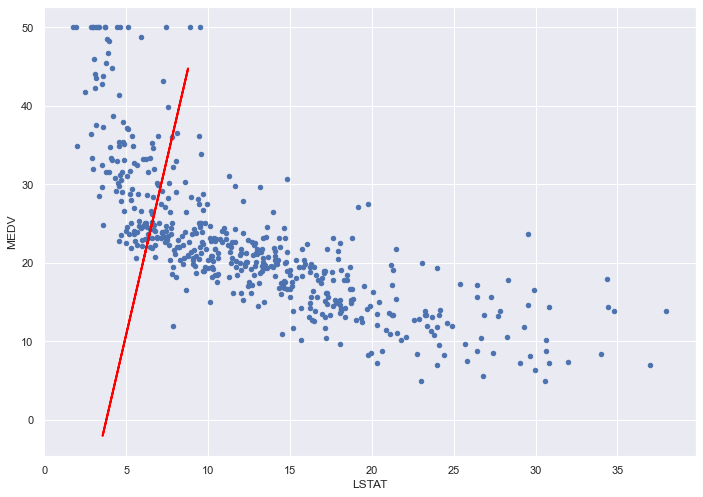

In [38]:
allpred=reg.predict(x_matrix) # prediction for all values 100% data set
boston.plot(kind="scatter",x="LSTAT",y="MEDV") # scatter plot
plt.plot(x,allpred,c="red",linewidth=2) #drawing the best fit line

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


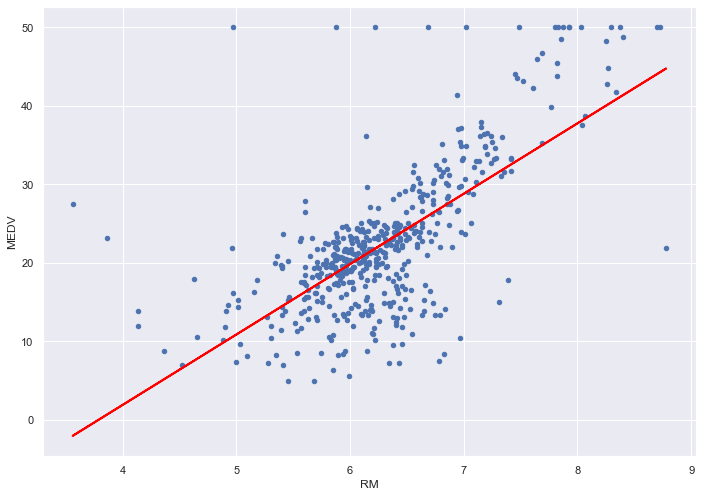

In [39]:
allpred=reg.predict(x_matrix) # prediction for all values 100% data set
boston.plot(kind="scatter",x="RM",y="MEDV") # scatter plot
plt.plot(x,allpred,c="red",linewidth=2) #drawing the best fit line

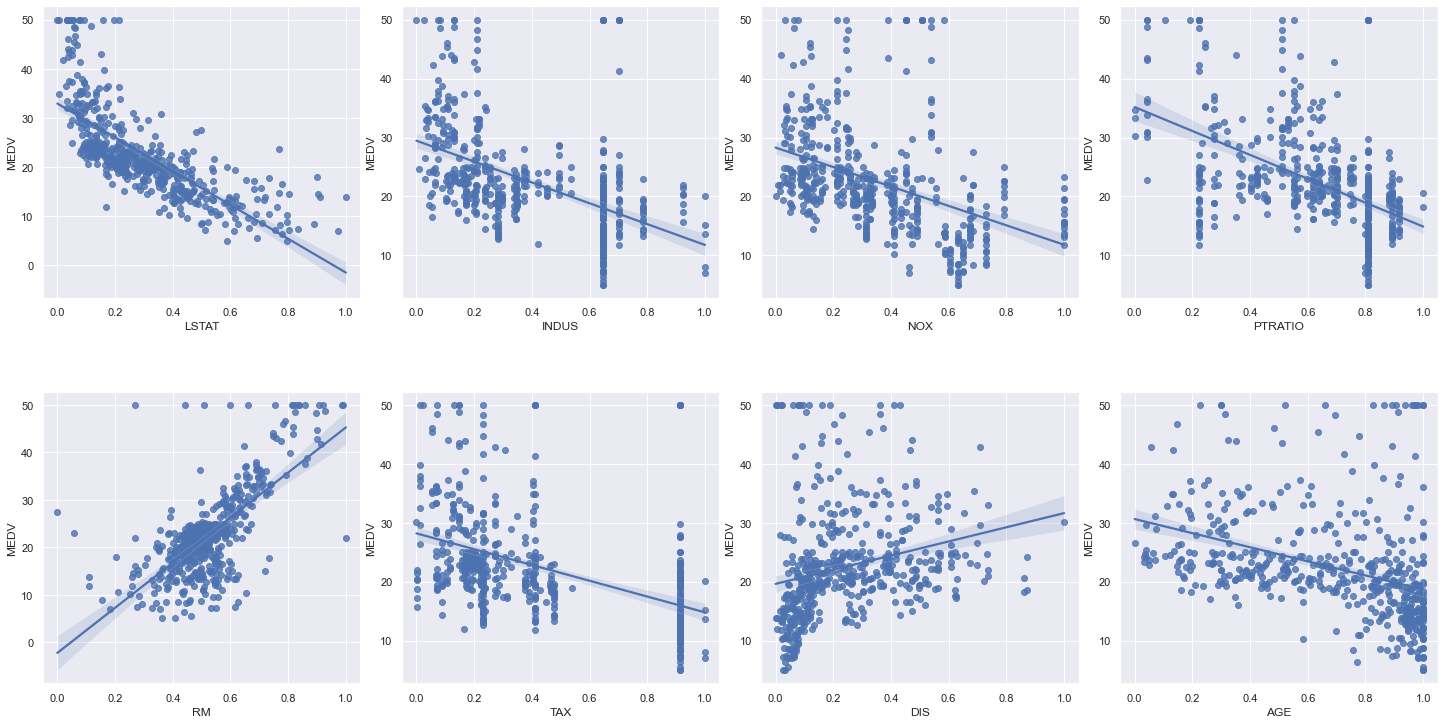

In [40]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = boston.loc[:,column_sels]
y = boston['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0 )